# Задача Титаник

### Основная цель работы: нужно предсказать выживет ли пасажир

# Получение данных и импорт библеотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/titanictest/Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Значение колонок:
1. **PassengerId** - уникальный идентификатор пассажира
2. **Survived** - целевой признак (0 - не выжил 1 - выжил)
3. **Pclass** - класс билета (1, 2 или 3)
4. **Name** - имя и титул пассажира
5. **Sex** - пол пассажира (male или female)
6. **Age** - возсраст пассажира
7. **SibSp** - количество родственников и жены/мужы на борту
8. **Parch** - количество родителей и детей на борту
9. **Ticket** - номер билета
10. **Fare** - стоимость билета
11. **Cabin** - номерю каюты (если доступна)
12. **Embarked** - порт отправления (C, Q, S)

# EDA

## Визуализация распределения признаков

#### Зададим цветовую палитру

In [4]:
sns.set(style='whitegrid')
colors = ['#3A1078', '#3795BD', '#D7C0AE']

palette = {1: colors[0], 0: colors[1]}

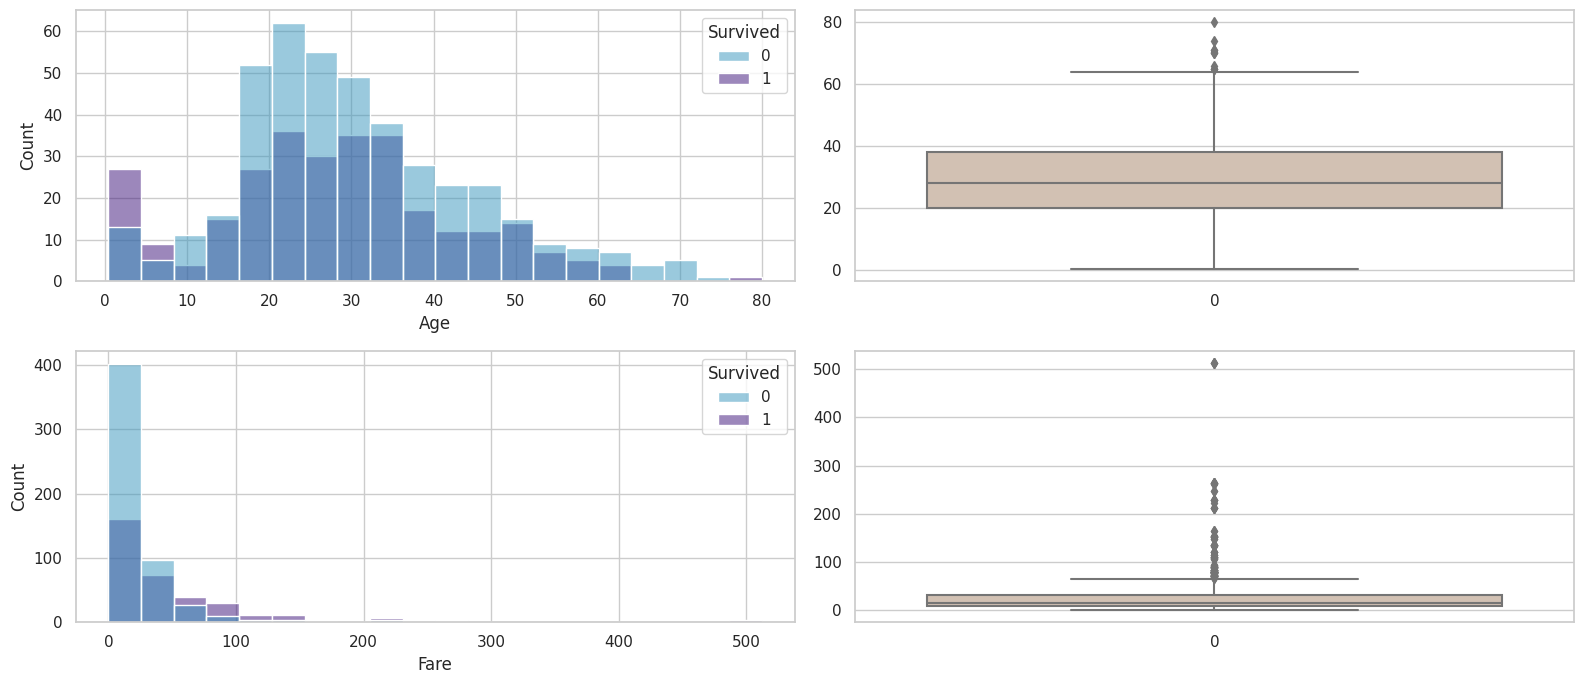

In [5]:
plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=20, hue='Survived', palette=palette)

plt.subplot(2, 2, 2)
sns.boxplot(df['Age'], color=colors[2])

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Fare', bins=20, hue='Survived', palette=palette)

plt.subplot(2, 2, 4)
sns.boxplot(df['Fare'], color=colors[2])

plt.tight_layout()
plt.show()

### 1. Графики распределения возраста:
* **Гистограмма возраста** показывает, что молодые пассажиры состовляли большую часть выборки. Среди неих есть как выжившие, так и погибшие. Процент выживших больше среди детей и подростков, что может говорить о приоритете спасения детей.
* **Boxplot возраста** подтверждает, что меддианный возраст пассажиров находится между 20 и 40 годами. Также наблюдаются выборосы среди пассажиров возраст которых равен или больше 60 лет. Выжившие распределены преимущественно среди более молодых групп, в то время как пожилые пасажиры имеют меньше шанс на выживание.

### 1. Графики распределения стоимости билетов (Fare):
* **Гистограмма стоимости билета** показывает, что большинство пассажиров имели билеты с низкой стоимостью (ниже 100 едениц). Среди пассажиров с более высокими значениями (от 100 и выше) выживаемость выше, что может указывать на корреляцию между классом обслуживания и шансами на спасение.
* **Boxplot стоимости билета** показывает значительое количество выбросов среди высоких значений. Это говорит о том, что некоторые пассажиры купили очень дорогие билеты, что может быть связанно с более высоким классом обслуживания и, как следствие, с большей вероятностью на спасение

#### Заключение:
* Молодой возраст и высокая стоимость билета положительно коррелируют с выживаемостью. Вероятно дети и пассажиры в более высоком классе имели преимущество при спасении.
* Пожилые пассажиры и пассажиры с дешевыми билетами имели меньший шанс на выживание, что может указывать на социальные или экономические приоритеты при эвакуации.

#### Посмотрим в логарифмическом масштабе

<Axes: xlabel='Fare', ylabel='Count'>

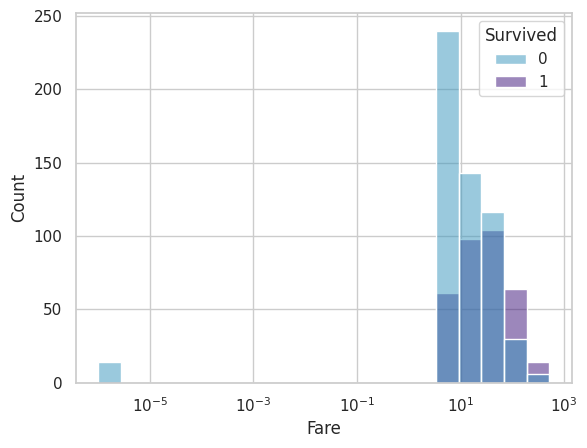

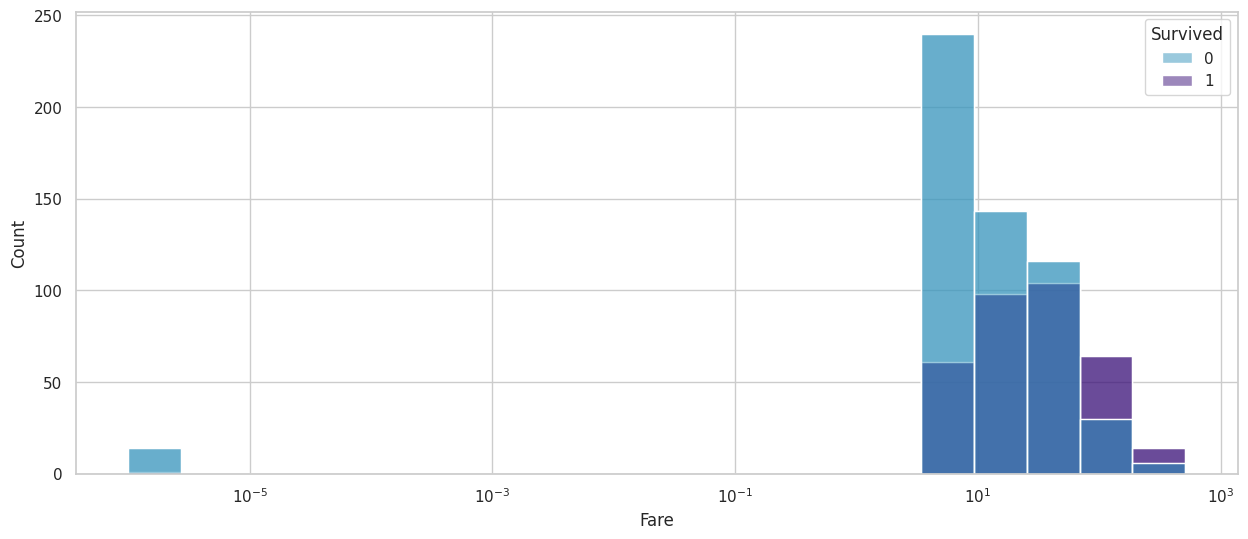

In [6]:
df['Fare'] += 1e-6  # добавляем очень маленькое число ко всем значениям Fare
sns.histplot(data=df, x='Fare', bins=20, log_scale=True, hue='Survived', palette=palette);

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Fare', bins=20, log_scale=True, hue='Survived', palette=palette,);


sns.histplot(data=df, x='Fare', bins=20, hue='Survived', palette=palette)

#### Удалим все что меньше 2 и больше 100

In [7]:
question_fare = df[(df['Fare'] >= 100) | (df['Fare'] <= 2)]
df = df.drop(question_fare.index)
df = df.reset_index(drop=True)

#### Построим график распределения выживаемости по полу

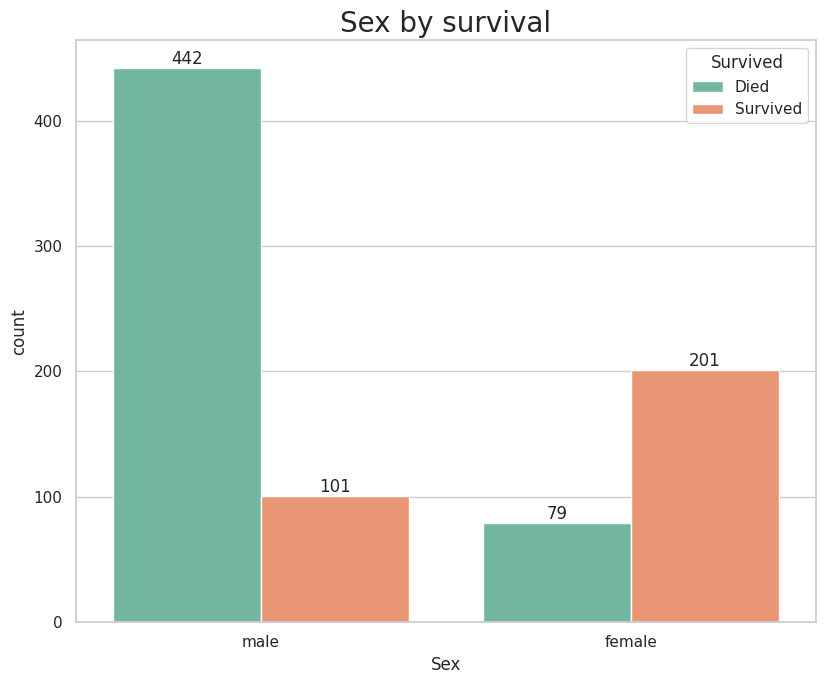

In [8]:
palette_1 = sns.color_palette('Set2')
plt.figure(figsize=(16, 7))

ax = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df, palette=palette_1, ax=ax)
ax.bar_label(ax.containers[0])
if len(ax.containers[0]) > 1:
    ax.bar_label(ax.containers[1])

plt.legend(('Died', 'Survived'), title='Survived')
plt.title('Sex by survival', fontsize=20)

#ax = plt.subplot(1, 2, 2)
#sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()
#sex_survived_counts.plot(kind='pie', y=1, explode=[0.1, 0.1], autopct='%1,2f%%', shadow=True, ax=ax, colors=palette_1)
#ax.set_ylabel('')
#ax.set_title('Sex Distribution by Survival', fontsize=20)

plt.tight_layout()
plt.show()

#### **График распределения выживаемости по полу**
* Среди мужчин выживаемость значительно ниже: из 543 мужчин, выжило 101. Это указывает что мужчины имели меньше шансы на выживание. Думаю это связано с тем, что в приоритете спасения были дети и женщины.
* Среди женщин, напротив, выживаемость выше: из 280 женщин, выжило 201. То есть у женщин более высокая вероятность на спасение.

#### Заключение:
Из графика можно сделать выовд, что пол сильно влияет на выживание. Женщина выживали чаще мужчин, что говорит о том, что на спасение в приоритете были дети и женщины. Это показывает культуру и воспитание.

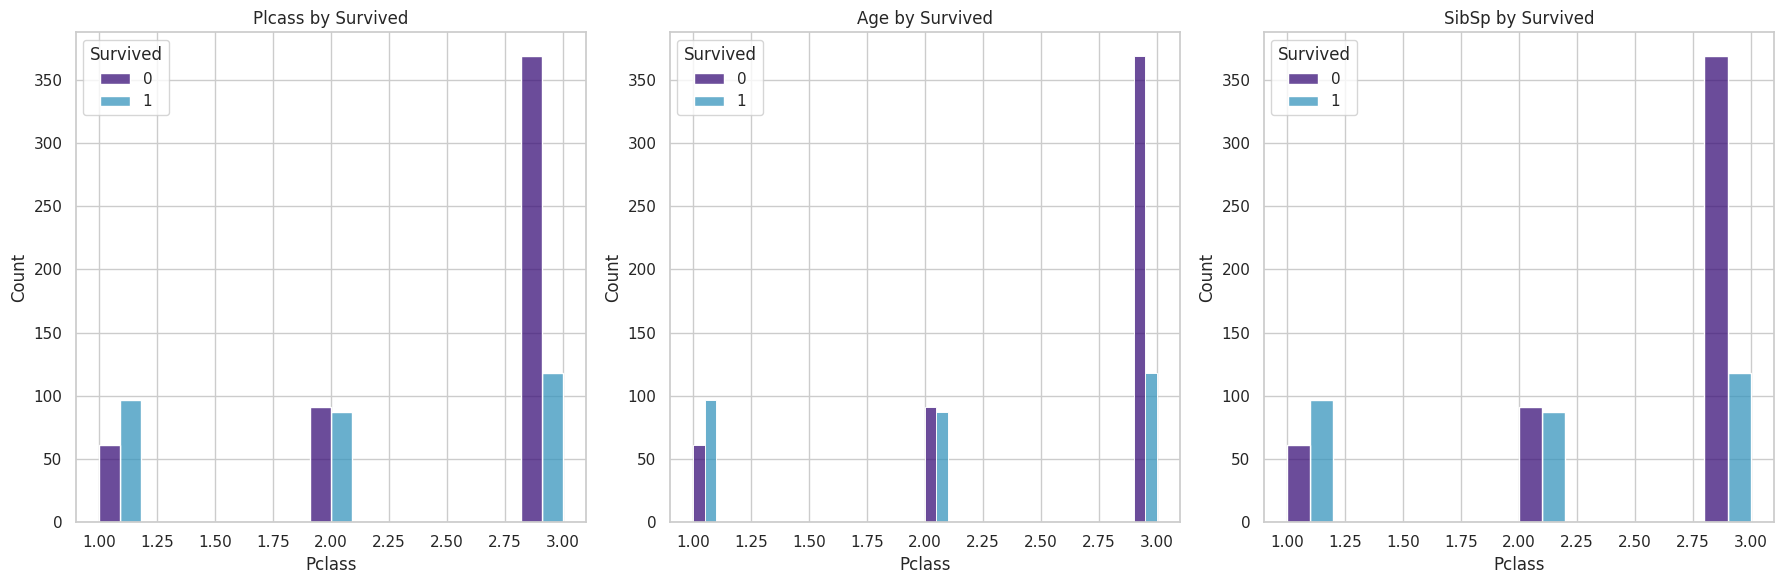

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(data=df, x='Pclass', hue='Survived', multiple='dodge', palette=colors[:2], ax=axes[0])
axes[0].set_title('Plcass by Survived')

sns.histplot(data=df, x='Pclass', hue='Survived', bins=20, multiple='dodge', palette=colors[:2], ax=axes[1])
axes[1].set_title('Age by Survived')

sns.histplot(data=df, x='Pclass', hue='Survived', bins=10, multiple='dodge', palette=colors[:2], ax=axes[2])
axes[2].set_title('SibSp by Survived')

plt.tight_layout()
plt.show()

#### График 1: Распределение выживаемости по классу
* Пассажиры первого класса имели наибольшие шансы на выживание: среди них больше выживших, чем погибших.
* Во втором классе шансы на выживаемость также довольно высокие, хотя разница между выживаемость первого класса и второго класса очень велика (около 210). Также разница между выжившими и погибшими не так сильно велика, как таже разника только в пером классе
* Пассажиры третьего класса имели наименьшие шансы на спасение. Большинство из них погибло и выживших среди них значительно меньше, чем в других классах. Это может быть связано с тем, что значимость социальных и экономических навыков пассажира играли большую роль в приоритете спасения и также в доступности спасательных ресурсов.

#### График 2: Распределение выживаемости по возрасту
* Молодые пассажиры (особенно дети и подрости) имели более высокие шансы на выживаине. Это может указывать на приоритет спасения детей.
* Среди взрослых пассажиров доля погибших увеличивается, особенно для возрастов от 20 до 40 лет, где погибших болеше, чем выживших.
* Пожилые пассажиры также имели невысокие шансы на выживание, что может свидетельстовать о трудностях при эвакуации для этой возрастной группы.

#### График 3: Распределение выживаемости по кол-ву родственников на борту
* Пассажиры, у которых не было братьев/сестер или супругов на борту (SibSp = 0), чаще погибали, хотя среди них также есть значительное число выживших.
* Пассажиры с 1 родственником (SibSp = 1) имели более высокие шансы на выживание. Это может быть связано с возможностью получать поддержку и помощь от сленов семьм во время эвакуации.
* С увеличением кол-во родствеников на борут (SibSp >= 2) шансы на выживаемость падают, а чилос погибших растет. Вероятно, большие семьи могли испытывать при эвакуации, особенно с маленькими детьми или пожилые членами семьи.

#### Заключение:
* Класс обслуживания и возраст сильно влияют на шансы выживаниея. Пассажиры первого и второго класса и дети имели более выкоие шансы на спасение.
* Пассажиры с 1 родственником имели более высокие шансы на выживание. Тогда как эвакуации.

### Матрица корреляции в виде тепловой карты

#### Нарисуем матрциу корреляции в виде тепловой карты, чтобы понять какие признаки, как коррелируеют между собой.

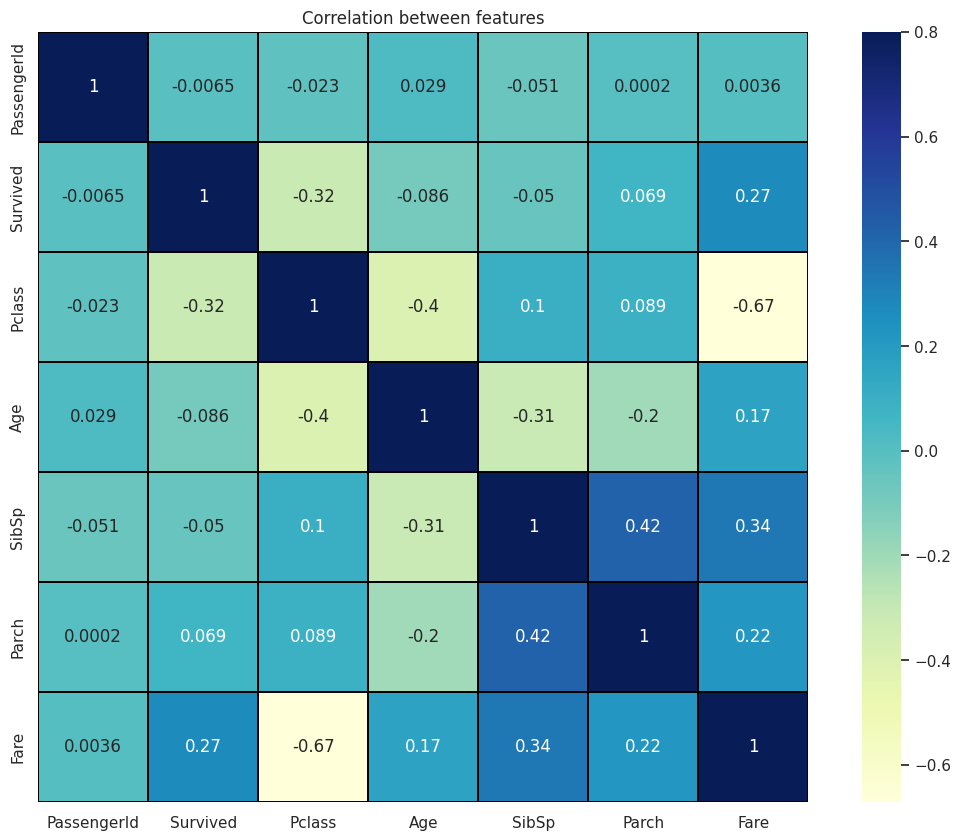

In [10]:
df_numeric = df.select_dtypes(exclude=['object', 'category'])
corr = df_numeric.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')
plt.show()

#### Основные наблюдения:
1. Класс обслуживания (Pclass) и выживаемость (Survived):
    * Существует отрицательная корреляция между классом обслуживания и выживаемостью. Это подтверждает, что пассажиры более высокого класса имели больше шансов на выживание по сравнению с пассажирами низкого класса.
2. Стоимость билета (Fare) и класс обслуживания (Pclass):
    * Корреляция между стоимостью билета и классом очень низкая. Это высокая отрицательная корреляция, указывающая на то, что билеты более высокого класса имели более высокую стоимость по сравнению с билетами третьего класса.
3. Возраст (Age) и класс обслуживания (Pclass):
    * Наблюдается средняя отрицательная корреляция между возрастом и классом. Это может указывать на то, что пассажиры более молодого возраста чаще находились в низком классе обслуживания
4. Стоимость билета (Fare) и выживаемость (Survived):
    * Существует положительная корреляция между стоимостью билета и шансами на выживание, что может означать, что пассажиры с более дорогими билетами имели более высокие шансы на спасение. Это согласуется с более высокой выживаемостью первого класса.
5. Количество родителей/детей на борту (Parch) и количество братьев/сестер/супругов на борту (SibSp)
    * Между Parch и SibSp есть положительная корреляция. Это логично так как семьи с большим количеством членов могут включать и других родствеников

### Заключение:
* Класс и стоимость билета являются важными факторами, влияющими на выживаемость.
* Семейные группы имеют положительную корреляцию, что говорит о том, что на борту присутствуют семьи и это может косвенно влиять на выживаемость.

# Feature Enginneering

#### Из графиков видно, что отсутсвие родственников на корабле сказывалось на выживаемость

In [11]:
df['IsAlone'] = (df['SibSp'] + df['Parch'] + 1 == 1).astype(int)

#### Также добавим признак по титулу, так как он тоже может влиять на таргетную переменную

In [12]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#### Нарисуем графики зависимости новых признаков от тагретной переменной

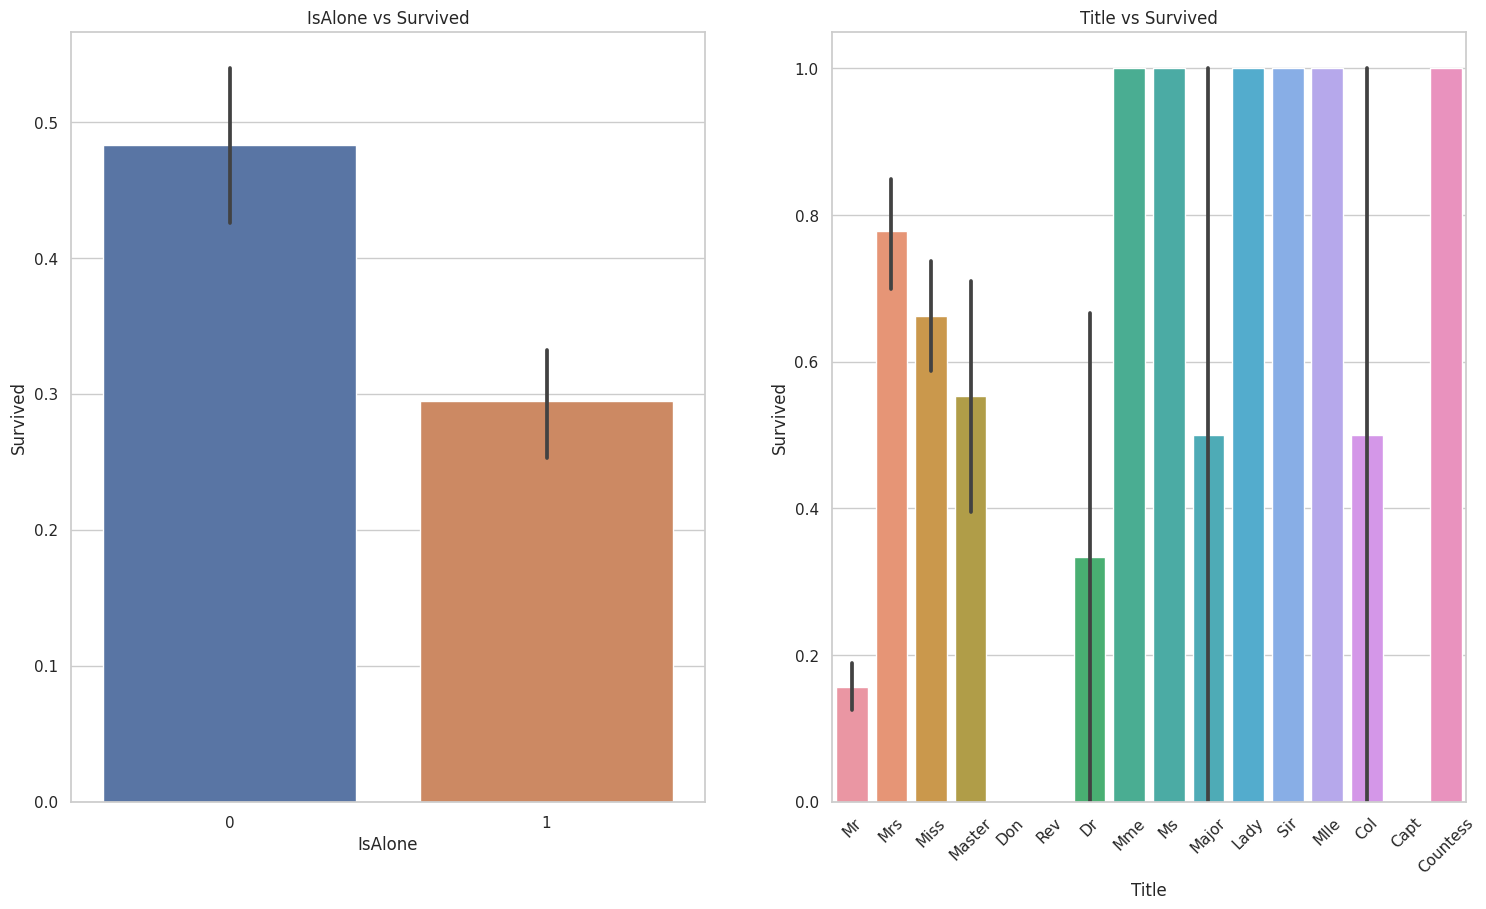

In [13]:
#визуализация зависимости новых признаков от 'Survived'
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#familySize
sns.barplot(x='IsAlone', y='Survived', data=df, ax=axes[0])
axes[0].set_title('IsAlone vs Survived')

#title
sns.barplot(x='Title', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Title vs Survived')
axes[1].tick_params(axis='x', rotation=45)

### График 1: Взаимосвязь между одиночеством (IsAlone) и выживаемость (Survived)
* Пассажиры, которые путешествовали не в одиночку (IsAlone = 0), имели значительно более высокие шансы на выживание, чем те, кто был один (IsAlone = 1).
* Это может быть связанно с тем, что при спасение семью не разделяли и спасали целиком. Также с семьей легче переносить сложные ситуации и можно принять разумное решение. Мне кажется что тех, кто были одни, некому было поддержать и поднять дух, и поэтому они смирились со своей участью, а те кто был с семьей, они не могли себе позволить, чтобы кто-то из их любимых людей пострадал и делали все что в их силах

### График 2: Взаимосвязь между титулом (Title) и выживаемость (Survived)
* Титулы, такие как "Mrs", "Miss", "Master", имели более высокие шансы на выживаемость, что может быть связано с тем, что в первую очередь спасали женщин и детей.
* Мужчины с титулом "Mr" имели значительно низкие шансы на выживание, что согласуется с предыдущеми выводами.
* Пассажиры с титулами указывающими на высокий статус в обществе, такие как: "Countess", "Lady", "Sir", имели значительно высокие шансы на выживаемость, что может быть связано с тем, что людей из первого класса имели больше шансов на выживаемость
* Некоторые менее распространенные титулы, такие как "Capt", "Dr", и "Rev", имели низние показатели выживаемости, возможно, потому что эти пассажиры не попадали в приоритетные категории для спасения.

### Заключение
* Пассажиры путешествующие в одиночку, имели меньше шансов на выживаемость, тогда как наличие родствеников на корабле увеличивало показатели выживаемости
* Титут также имел значение на выживаемость. Женщины и дети и пассажиры с высоким соц. статусом имели болешь шансов на спасение, чем мужчины и пассажиры с низким соц. статусом.
* Эти наблюдения подчеркивают важность соц. факторов на выживаемость.

In [14]:
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

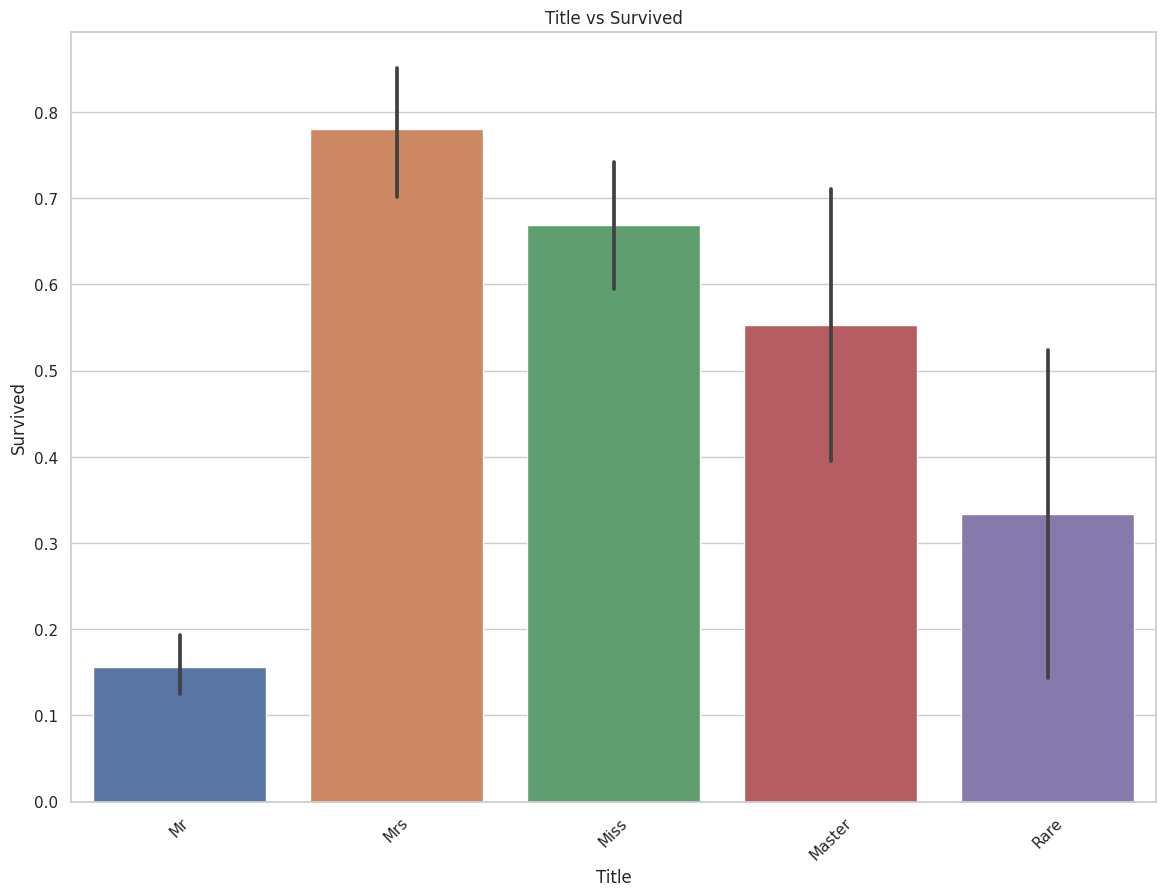

In [15]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Title vs Survived')
plt.tick_params(axis='x', rotation=45)

### Вывод по каждому титулу:
1. Mr:
   * Пассажиры с титулом "Mr" имели самые низкие шансы на выживание (около 0.15). Это указывает, что взрослые мужчины были менее приоритетной группой спасения.
2. Mrs:
   * Титул "Mrs" (замужние женщины) показывает высокую вероятностью выживания (около 0.8). Это можно объяснить тем, что женщины с родственными связями имели более высокий шанс на выживание.
3. Miss:
   * Титул "Miss" (незамужние женщины) также показывает высокий шанс на спасение (около 0.7), но немного ниже, чем у замежних женщин.
4. Master:
   * Этот титул обычно носят дети мужского пола. Также имеет высокую вероятность на спасение (около 0.55). Это показывает, что дети, независимо от пола, в приоритете на спасение.
5. Rare:
   * В эту категорию входят редкие титулы, такие как: "Dr", "Rev", "Col" и другие. Шанс на спасение (около 0.3) не такой большой. Это может быть связано с тем, что пассажиры с такими титулами не всегда были в приоритете на спасение.

### Общий вывыод:
* Женщины (с титулами "Mrs" и "Miss") и дети (с титулом "Master") имели высокие шансы на выживание.
* Мужчины с титулом "Mr" имели значительно низкие шансы на спасение.
* Пассажиры с редкики титулами (категория "Rare") также имели сравнительно низкие шансы на спасение.

# Нормализация датасета

Видим умеренную обратную корреляцию между классом и стоимостью билета, что логично, так как чем дороже билет, тем выше класс

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            164
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          665
Embarked         2
IsAlone          0
Title            0
dtype: int64

Age и Embarked можно заполнить, а Cabin лучше удалить, так как слишком много пропусков.

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Кодирование категориальных данных

In [18]:
cat_fetures = ['Sex', 'Embarked', 'Title']
for feature in cat_fetures:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

Удаление ненужных колонок

In [19]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Разделение данных

Разделение на признаки и таргетную переменную

In [20]:
x = df.drop('Survived', axis=1)
y = df['Survived']

Масштабирование признаков

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Преобразование в NumPy массивы для Keras

In [22]:
x = np.array(x)
y = np.array(y)

Разделение на тренировочную и тестовую выборки

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

One-hot кодирование целевой переменной

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Построение и обучение модели

импортируем библеотеки

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

Метрики для задачи классификации:
* Accuracy (точность) - это доля правильно предсказанных классов ко всем предсказаниям.
* Confusion Matrix (матрица ошибок) - раскрывает детали результатов классификации, что полезно для выявления проблем, таких как ложные положительные и ложные отрицательные ответы
* Precision (точность) - это доля правильных ответов модели в пределах класса. То есть доля объектов, действительно принадлежащих данному классу относительно всех объектов, которые система отнесла к этому классу.

In [26]:
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

input_dim = x_train.shape[1]
model = build_model(input_dim)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_split=0.2,
                   verbose=0, callbacks=[early_stopping])

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Точность на тестовых данных: {accuracy:.4f}, Потеяр на тестовых данных: {loss:.4f}')

Точность на тестовых данных: 0.7818, Потеяр на тестовых данных: 0.5504


В этом коде я создал и обучил свою первую модель нейронной сети для задачи бинарной классификации. Модель состоит из нескольких слоев (Dense) с функцией активации ReLU и регуляризацией l2, что помогает предотвратить переобучение. Я также испольлзовал слои Dropout, чтобы дополнительно снизить риск переобучения, отлючая 60% нейронов на каждом слое во время обучения. На послденем слое стоит функция активации softmax, чтобы получить вероятности для двух классов.

Обучение проводилось с использованием оптимизатора Nadam и функции потерь binary_crossentropy, что подходит для задачи бинарной классификации. Я также добавил ранюю остановку (EarlyStopping), чтобы модель прекращала обучение, если валадиционные потери перестанут скижаться, что должно улучашить обобщающую способность модели.

После обучения модель была протестирована на тестовых данных и я получил следующие результаты:
* Точность на тестовых данных: 0.7818
* Потери на тестовых данных: 0.5504
Эти метрики показывают, что модель имеет точность около 78% на тестовой выборке, что является хорошим результатом для первой попытки. Однако потери все еще довольно высокие, что может указывать на необходимость дальнейней настройки модели для улучшения ее качества.

Построим графики метрик accuracy и loss

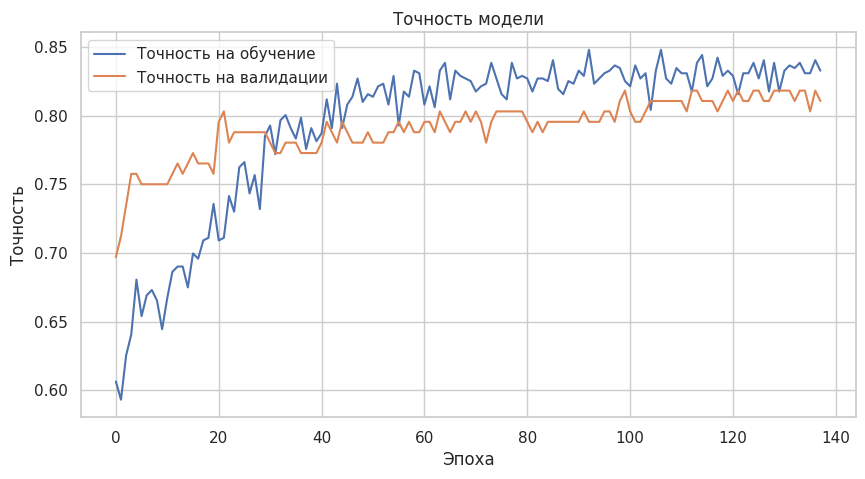

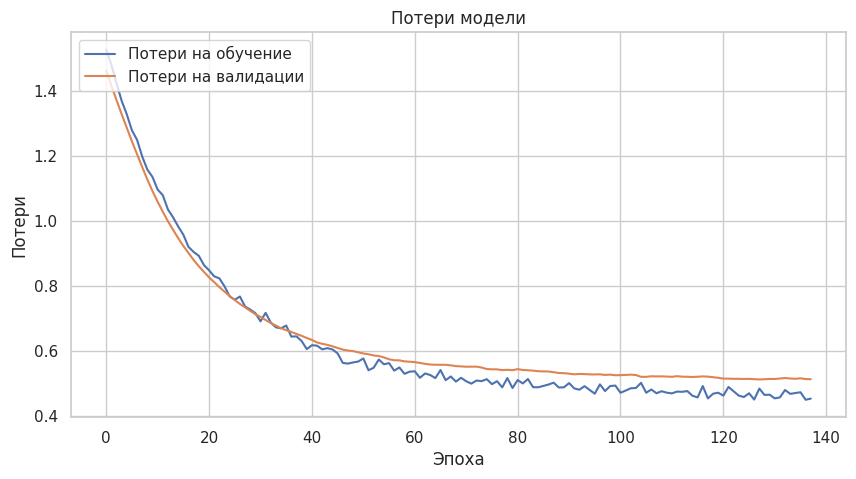

In [34]:
#график accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Точность на обучение')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='upper left')
plt.show()

#график loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери на обучение')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper left')
plt.show()

### Точность модели 
* Видно, что очность на обучении плавно увеличивается и достигает стабильного значения примерно на 50 эпохе.
* Точность на валидации стабильно возрастает и достигает стабильного значения примерно на 20 эпохе.
* Отсутсвие заметного расхождения между графиками обучающей и валидационной точности после 30 эпохи указывает на то, что модель не переобучается и демонстрирует стабильное поведение. 

### Потери модели
* Потери на обучающей выборке постепенно снижаются на протяжении всех эпох, указывая на постепенное улучшение модели.

# Анализируем датасет

# Гипотезы

# Cоздание признаков

# Нормализация датасета

# Корреляция новых признаков с таргетом

# Обучение на простой модели

# Permutation Importance

# Построение модели

# Работа с моделью

# Кросс-валидация

# Сохранение и загрузка модели

# Заключение и выводы

In [27]:
df = pd.read_csv('/kaggle/input/titanictest/Titanic.csv')

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Значение колонок:
1. **PassengerId** - уникальный идентификатор пассажира
2. **Survived** - целевой признак (0 - не выжил 1 - выжил)
3. **Pclass** - класс билета (1, 2 или 3)
4. **Name** - имя и титул пассажира
5. **Sex** - пол пассажира (male или female)
6. **Age** - возсраст пассажира
7. **SibSp** - количество родственников и жены/мужы на борту
8. **Parch** - количество родителей и детей на борту
9. **Ticket** - номер билета
10. **Fare** - стоимость билета
11. **Cabin** - номерю каюты (если доступна)
12. **Embarked** - порт отправления (C, Q, S)

Выдвинутые гипотезы:
* выживание зависит от номера каюты
* выживание зависит от класса билета
* выживание зависит от возсраста
* выживание зависит от пола
* выживание зависит от id
* выживание зависит от SibSp
* выживание зависит от Parch

In [29]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
df.shape

(891, 12)

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Минимальные критерии для запуска модели машинного обучения
1) отсутствие пропусков
2) убрать не числовые типы

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
кодируем данные 
колонки у которых тип данных object

SyntaxError: invalid syntax (649947281.py, line 1)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
categorical_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df

Видим что все колонны стали числами

In [ ]:
df.info()

теперь уберем пропуски в данных

In [ ]:
df.isnull().sum()

У нас пропуски только в колонке возраст
Заполним в ней нули медианным значением по этой же колонке

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.isnull().sum()

Сначала надо закодировать все в числа, затем заполнять пропуски

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X

In [ ]:
df['Survived'].value_counts()

Создаем модель

* изменил test_size на 0.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the merual network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
df.info()

график

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()